<a href="https://colab.research.google.com/github/nischithakn800-ux/import-export-dataset/blob/main/sports_medal_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project name-Olympic Medal Count by Country**

**Project type-Exploratory Data Analysis**

**Introduction**

For years, Olympics have been held around the world, and participants from around the world compete to succeed in different sports. We wanted to work with this data because we want to look for answers to the questions about which countries are superior in which branches, which countries are leading women or men in which sports and bringing medals to their country. We choose a dataset which is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. Dataset contains 271116 observations and 15 variables. ID, number, gender, age, height, weight, Team, NOC, games, Year, season, city, sport, event and medal parameters are used in this dataset as variables.

**Information of the Dataset**

The Athletes dataset contains 15 variables:

ID: A number used as a unique identifier for each athlete

Name: The athlete’s name(s) in the form of First Middle Last where available

Sex: The athlete’s gender; one of M or F 4 Age: The athlete’s age in years

Height: The athlete’s height in centimeters (cm)

Weight: The athlete’s weight in kilograms (kg)

Team: The name of the team that the athlete competed for

NOC: The National Organizing Committee’s 3-letter code

Games: The year and season of the Olympics the athlete competed in in the format YYYY Season

Year: The year of the Olympics that the athlete competed in

Season: The season of the Olympics that the athlete competed in

City: The city that hosted the Olympics that the athlete competed in

Sport: The sport that the athlete competed in

Event: The event that the athlete competed in

Medal: The medal won by the athlete; one of Gold, Silver, or Bronze. NA if no medal was won.



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving athlete_events.csv.zip to athlete_events.csv (1).zip


In [ ]:
import zipfile
import pandas as pd
import io

# Assuming the uploaded zip file name is 'athlete_events.csv (1).zip'
zip_file_name = 'athlete_events.csv (1).zip'

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()

# Assuming the extracted CSV file is named 'athlete_events.csv'
csv_file_name = 'athlete_events.csv'

# Load the CSV into a pandas DataFrame
try:
    df = pd.read_csv(csv_file_name)
    print("DataFrame loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file {csv_file_name} was not found after unzipping.")
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")

DataFrame loaded successfully!


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**One Variable Plots**

In this section, we plot one variable plots by using information from the dataset

**Distribution of ages**

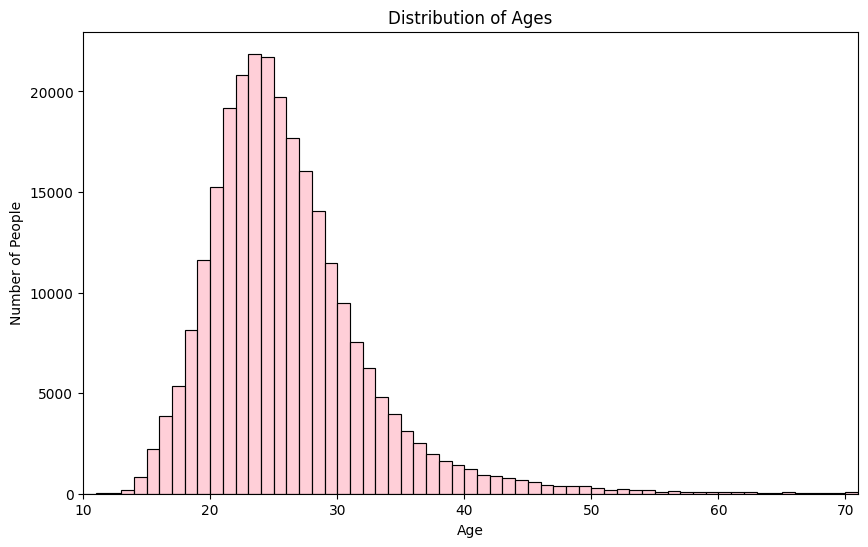

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in 'Age' for plotting
df_age = df.dropna(subset=['Age'])

# Create a histogram of the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df_age, x='Age', bins=range(10, 72, 1), kde=False, color='pink') # Using range for bins to match binwidth=1 and limits
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Distribution of Ages")
plt.xticks(range(10, 71, 10)) # Setting x-axis breaks
plt.xlim(10, 71) # Setting x-axis limits
plt.show()

In this plot, we want to see the distribution of ages by number of people. We choose histogram because we want to see clearly the age distribution from the plot by looking the columns. We can see that there is the highest number of athletes between the ages of 20-30. The 23-year-old athletes participate in the Olympics. There is no participation of athletes over the age of 56. In addition, the youngest athletes participating in the Olympics are 10 years old.

**Distribution of sport branches**

/tmp/ipython-input-2682263146.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.index, y=top_sports.values, palette='viridis') # Changed palette to 'viridis'


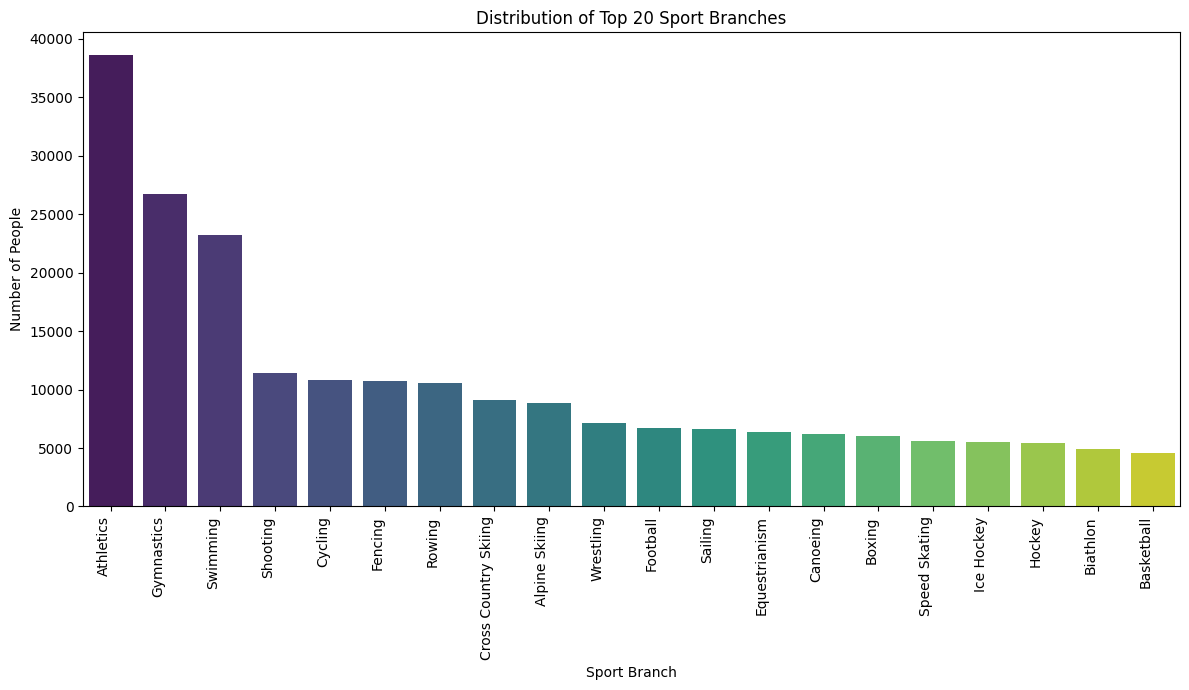

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sport
sport_counts = df['Sport'].value_counts()

# Select the top N sports for clarity, or plot all if desired
# For example, let's plot the top 20 sports
top_n = 20
top_sports = sport_counts.nlargest(top_n)

# Create a bar plot of the sport distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=top_sports.index, y=top_sports.values, palette='viridis') # Changed palette to 'viridis'
plt.xlabel("Sport Branch")
plt.ylabel("Number of People")
plt.title(f"Distribution of Top {top_n} Sport Branches")
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In this plot, we want to see the distribution of sport branchs by number of the branch count. We choose histogram because we want to see clearly the sport branch distribution from the plot by looking the columns. In addition we use theme to change angle of the branches so we can see the branches clearly on the x-axis. We can see easily ‘Art Competitions’, ‘Gymnastics’ and ‘Swimming’ has the higher rate than others. In addition, basketball was expected to be higher, but less athletes participated in many sports. The reason why this is a different detail is that in many countries the ‘Biathlon’ sport is less well known than Basketball.

**Distribution of sex**

/tmp/ipython-input-2335405108.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


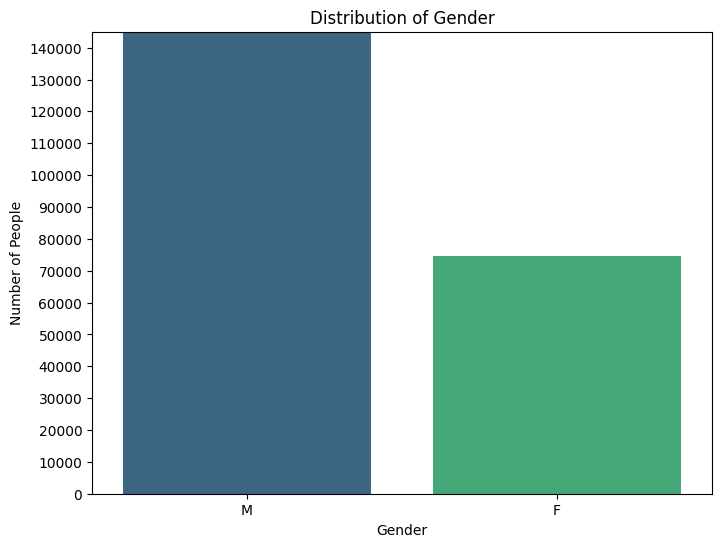

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each gender
gender_counts = df['Sex'].value_counts()

# Create a bar plot of the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.title("Distribution of Gender")
plt.ylim(0, 145000) # Setting y-axis limits
plt.yticks(range(0, 145001, 10000)) # Setting y-axis breaks
plt.show()

In this plot, we can observe the sex distribution of the participations. We choose histogram because we want to see clearly the sex distribution from the plot by looking the columns. As shown in the plot, the male competitor ratio is twice the female competitor ratio. It is very unfortunate that even in the field of sports branches such as the Olympics, we find women and men inequality.



**Distribution of heights**

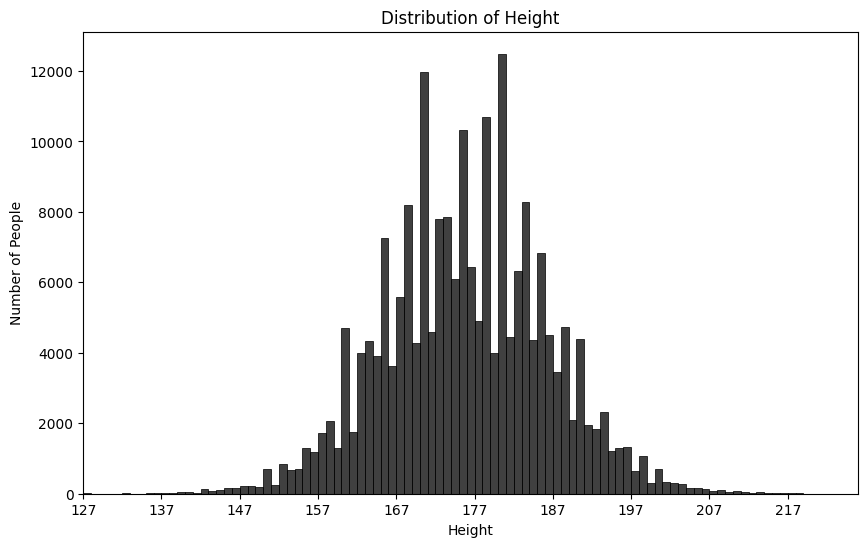

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in 'Height' for plotting
df_height = df.dropna(subset=['Height'])

# Create a histogram of the 'Height' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df_height, x='Height', bins=range(127, 227, 1), kde=False, color='black') # Using range for bins to match binwidth=1 and limits
plt.xlabel("Height")
plt.ylabel("Number of People")
plt.title("Distribution of Height")
plt.xticks(range(127, 227, 10)) # Setting x-axis breaks
plt.xlim(127, 226) # Setting x-axis limits
plt.show()

We just want to for observe the distribution of the heights. The best way to do this is to plot a histogram

**Distribution of weights**

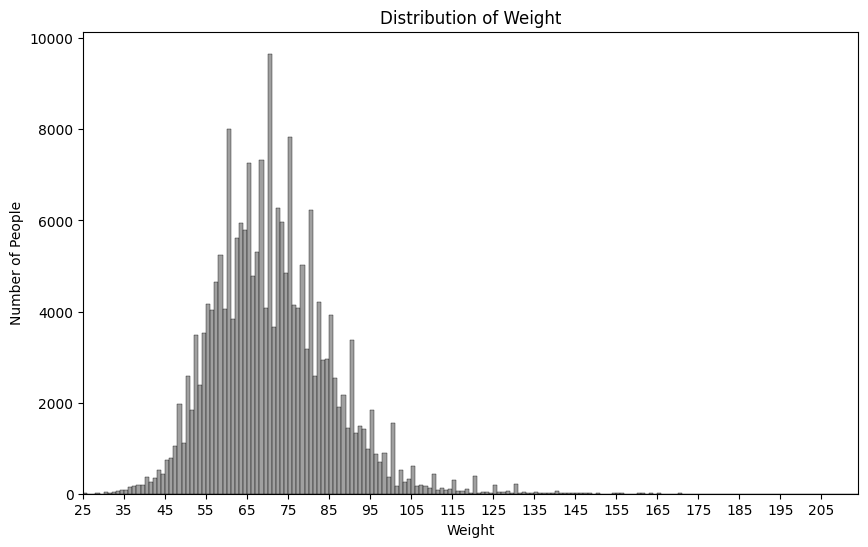

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in 'Weight' for plotting
df_weight = df.dropna(subset=['Weight'])

# Create a histogram of the 'Weight' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df_weight, x='Weight', bins=range(25, 215, 1), kde=False, color='grey') # Using range for bins to match binwidth=1 and limits
plt.xlabel("Weight")
plt.ylabel("Number of People")
plt.title("Distribution of Weight")
plt.xticks(range(25, 215, 10)) # Setting x-axis breaks
plt.xlim(25, 214) # Setting x-axis limits
plt.show()

We just want to for observe the distribution of the weights. The best way to do this is to plot a histogram

**Two Variable Plots**

In this section, we plot two variable plots by using information from the dataset

**Distribution of medal and ages**

/tmp/ipython-input-2399115566.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_medal_age, x='Medal', y='Age', palette='viridis')


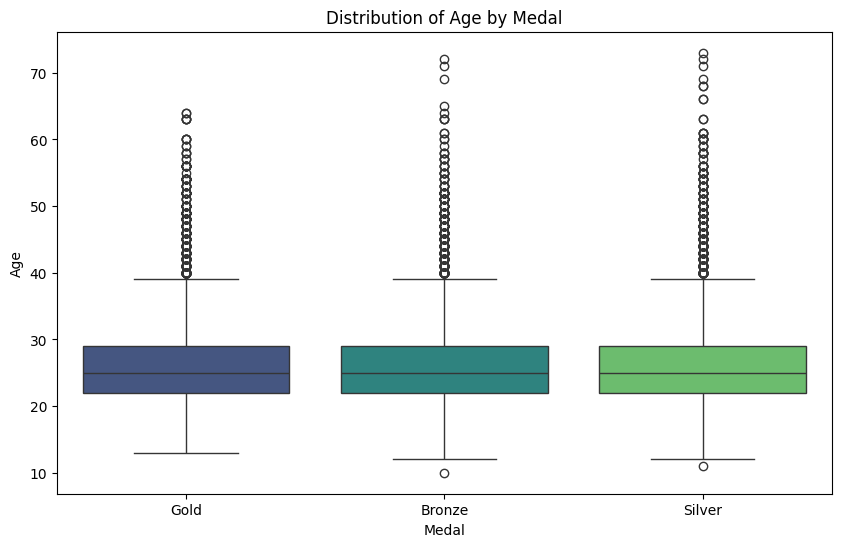

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in 'Age' and 'Medal' for plotting
df_medal_age = df.dropna(subset=['Age', 'Medal'])

# Create a box plot of Age by Medal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_medal_age, x='Medal', y='Age', palette='viridis')
plt.xlabel("Medal")
plt.ylabel("Age")
plt.title("Distribution of Age by Medal")
plt.show()

In this plot, we see the medal types of the people who were entering the Olympics. We handle the NA values by changing its value to the ‘No Medal’. We can see that there is the highest mean of medal awards between the ages of 22-28. Absolutely it is normal, because younger people are be able to win medals than the older people. In addition, we can see there are outliers after 38 age. We use boxplot because we want to see median and outliers to analyse and easily see the medal distribution statistics by age.

**Distribution of olympic games over years**

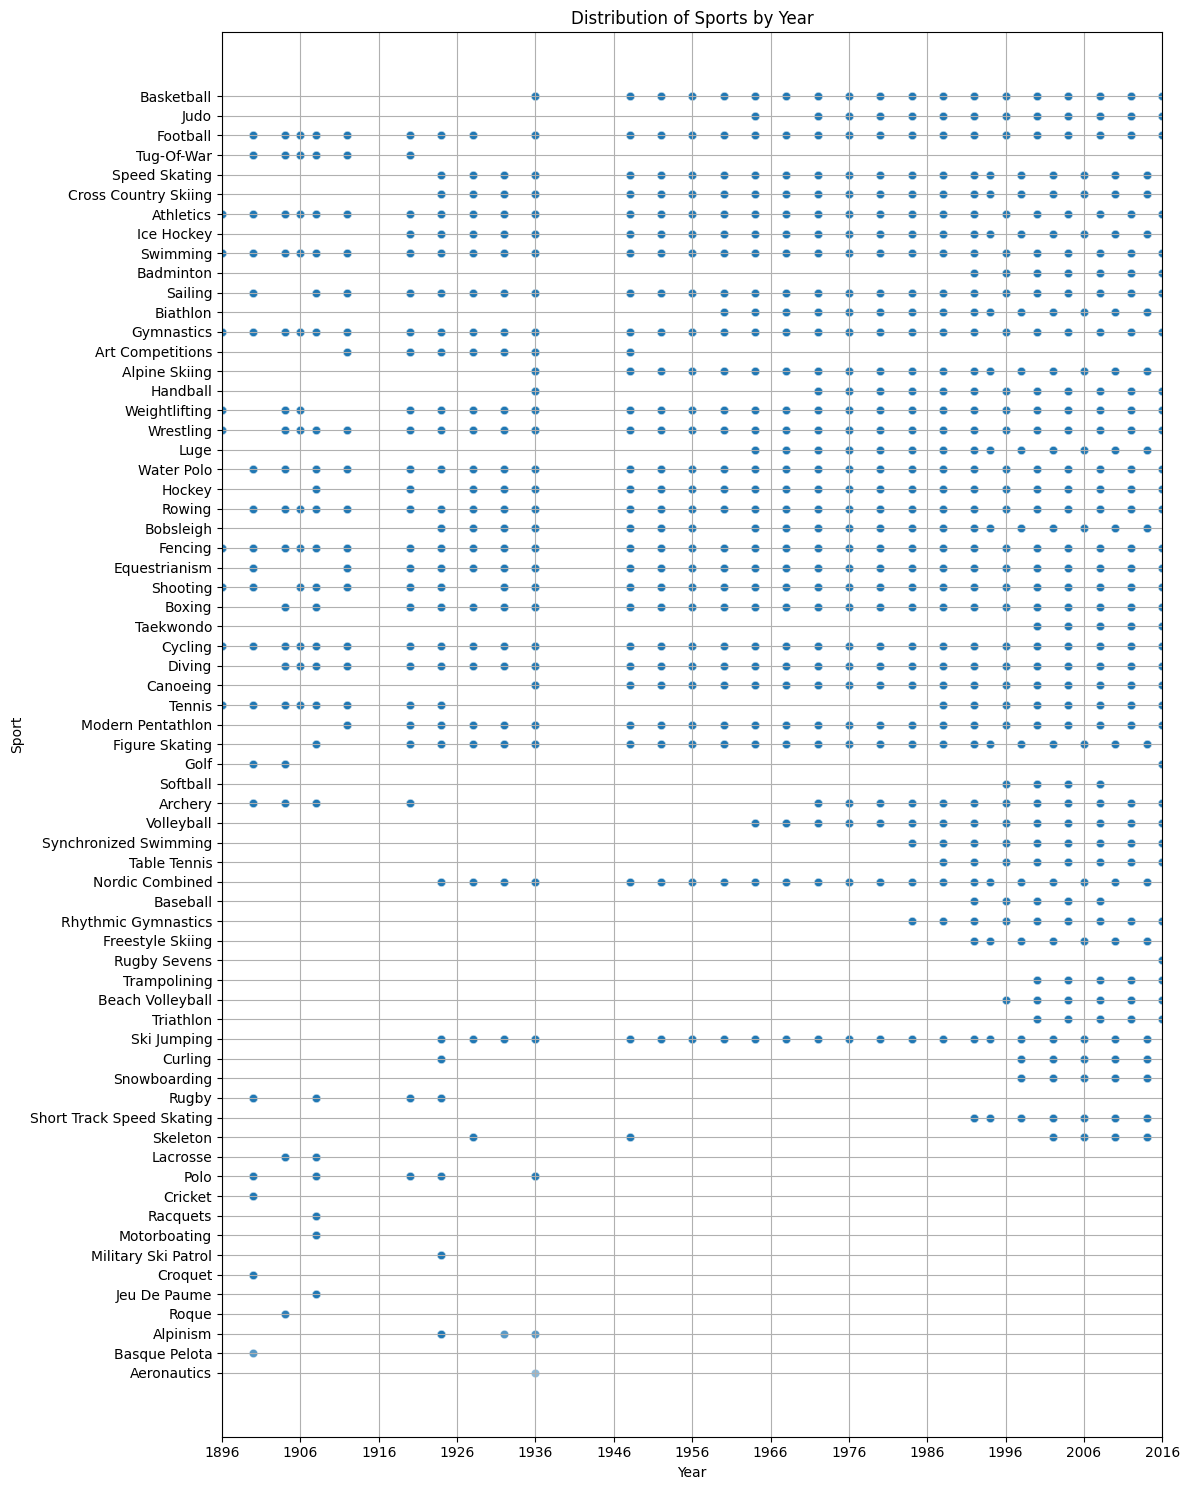

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of Year vs. Sport
plt.figure(figsize=(12, 15)) # Adjust figure size for better readability of sports
sns.scatterplot(data=df, x='Year', y='Sport', alpha=0.5) # alpha for transparency if points overlap
plt.xlabel("Year")
plt.ylabel("Sport")
plt.title("Distribution of Sports by Year")
plt.xticks(range(1896, 2017, 10)) # Setting x-axis breaks
plt.xlim(1896, 2016) # Setting x-axis limits
plt.grid(True) # Add a grid for better readability
plt.tight_layout() # Adjust layout
plt.show()

In this plot, we want to observe sports branchs and their played rate distributed by years. As we can see, there are huge gap between 1936-1948. In these years there were no olympics games played. Because that, there are World War II in these years. In addition, there are also a gap between 1912-1920. In these years there were mostly no olympics games played. Because that, there are World War I in these years. Lacrosse game branch have played at once in the 1905. It is so interesting, when we observe the olympics games. And the tennis branch was not played for 46 years in the period of 1924-1980. In the end, we can see the olympics games play in every 4 years.

**Distribution of medal counts and types over countries**

Yearly Football Competition Counts:


,Year,Events,Nations,Athletes
0,1900,1,3,35
1,1904,1,3,36
2,1906,1,4,45
3,1908,1,6,72
4,1912,1,11,163



Football Medal Counts by Team and Medal:


,Team,Medal,Count
0,Argentina,Gold,34
1,Argentina,Silver,34
2,Austria,Silver,13
3,Belgium,Gold,14
4,Brazil,Bronze,34


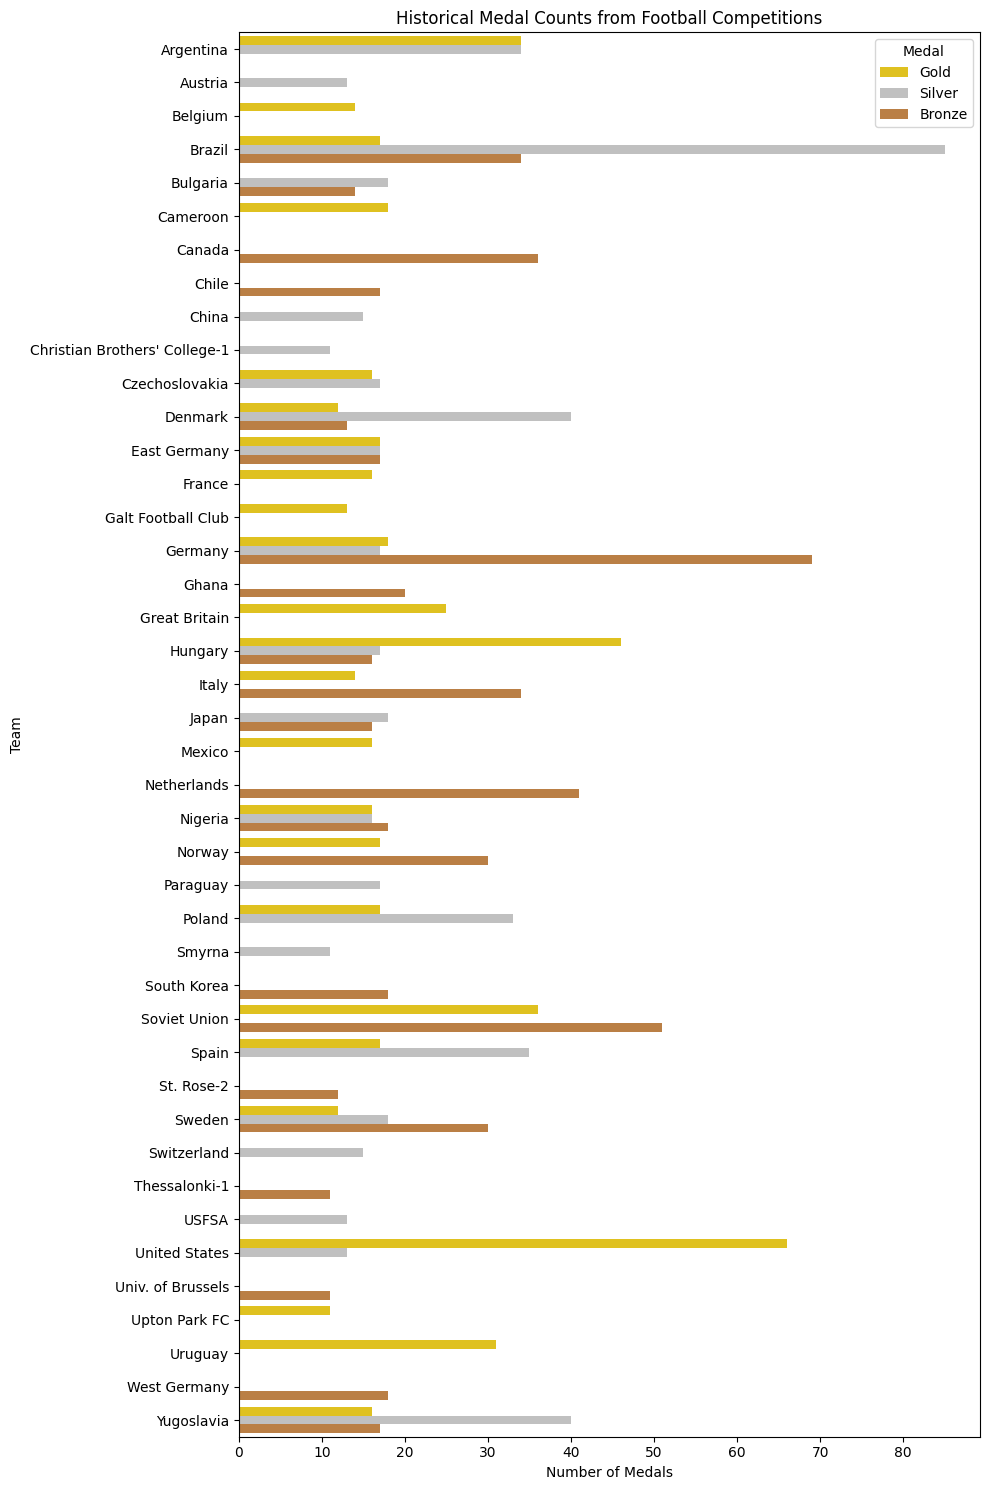

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Football
df_football = df[df['Sport'] == 'Football'].copy()

# Count Events, Nations, and Athletes in Football competitions each year
# Note: Counting unique 'Name' per year gives the number of athletes who participated in Football in that year.
counts_ftbl = df_football[df_football['Team'] != 'Unknown'].groupby('Year').agg(
    Events=('Event', 'nunique'),
    Nations=('Team', 'nunique'),
    Athletes=('Name', 'nunique') # Corrected to count unique names for athletes
).reset_index()

print("Yearly Football Competition Counts:")
display(counts_ftbl.head())


# Count number of medals awarded to each Team in Football
medal_counts_ftbl = df_football.dropna(subset=['Medal']).groupby(['Team', 'Medal']).size().reset_index(name='Count')

# Pivot the table to get medals as columns for easier plotting if needed, or keep long format
# Using the long format for seaborn barplot is usually straightforward

print("\nFootball Medal Counts by Team and Medal:")
display(medal_counts_ftbl.head())


# Plotting Historical medal counts from Football Competitions
plt.figure(figsize=(10, 15)) # Adjust figure size for better readability of teams
sns.barplot(data=medal_counts_ftbl, x='Count', y='Team', hue='Medal', palette={'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32'})

plt.xlabel("Number of Medals")
plt.ylabel("Team")
plt.title("Historical Medal Counts from Football Competitions")
plt.legend(title="Medal")
plt.tight_layout() # Adjust layout
plt.show()

In this plot, we can observe that the medal counts and types for each teams. As we can see, the most medal winners are USA, Germany, Brazil, SSCB, Yugoslavia. As a fact that the governments in these countries support. Olympic games especially football and as a natural result; these countries has more medals than other countries by the help of some politic reasons in their country. We choose histogram because we want to clearly see the medal distribution and also determine which medal type won by which country. We also flipped the histogram coordinates. Thus, we can easily analyze the medal distribution over the countries.

**Distribution of olympics participants over season**

Number of countries participating per year and season:


,Year,Season,NoOfCountries
0,1896,Summer,12
1,1900,Summer,31
2,1904,Summer,15
3,1906,Summer,21
4,1908,Summer,22


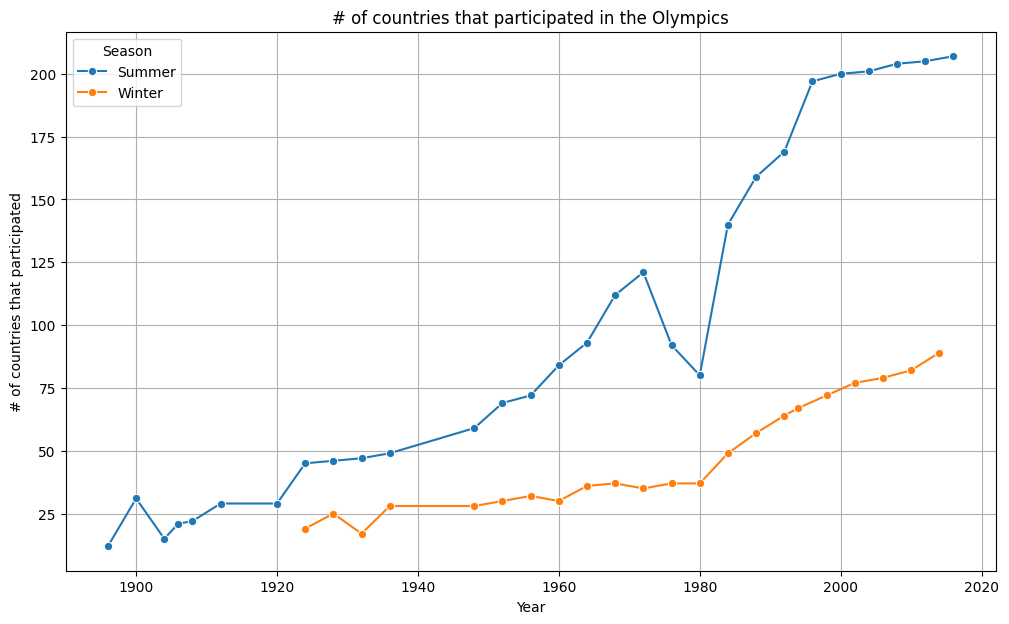

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year and Season and count the number of unique NOCs
country_counts = df.groupby(['Year', 'Season'])['NOC'].nunique().reset_index(name='NoOfCountries')

print("Number of countries participating per year and season:")
display(country_counts.head())

# Create a line plot of the number of countries over time, separated by season
plt.figure(figsize=(12, 7))
sns.lineplot(data=country_counts, x='Year', y='NoOfCountries', hue='Season', marker='o')
plt.xlabel("Year")
plt.ylabel("# of countries that participated")
plt.title("# of countries that participated in the Olympics")
plt.grid(True)
plt.show()

In this plot, we can observe that the number of participants in the olympics have grown overtime. It is also obvious that the number of participants in the summer olympics are more than that of the winter olympics. As a natural result, in summer olympics there are a lot of participants than winter olympics. We choose scatter plot and lines because we want to clearly see the weather distribution with rates and also determine which years and the count of the countries decreasing or increasing by looking the graph. Thus, we can easily analyze the weather rate over the countries that participated.

**Conclusion**

This exploratory data analysis of the Olympic Games dataset revealed fascinating insights into global athletic performance across time, geography, and disciplines. By visualizing medal counts by year, we observed clear trends in participation and dominance, with notable spikes during certain decades and host nations. The medals-per-capita analysis highlighted smaller nations that punch above their weight, offering a more equitable lens on athletic achievement beyond raw totals. Sport-wise dominance charts showcased how certain countries specialize in specific disciplines, reflecting cultural, economic, and infrastructural influences.

Overall, this project demonstrates how data can uncover hidden stories behind global events, challenge assumptions, and celebrate diversity in athletic excellence. With further enrichment—such as gender analysis, host country effects, or athlete-level performance—this dataset offers endless opportunities for deeper storytelling and predictive modeling.